In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
min_wage=pd.read_csv("data/new/Min_wage.csv",encoding="utf-8")
min_wage.head()

,date,Min wage(hour),Min wage Increase rate
0,2015-01-01,"5,580",7.1
1,2015-02-01,"5,580",7.1
2,2015-03-01,"5,580",7.1
3,2015-04-01,"5,580",7.1
4,2015-05-01,"5,580",7.1


In [3]:
min_wage.shape

(112, 3)

In [4]:
min_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    112 non-null    object 
 1   Min wage(hour)          112 non-null    object 
 2   Min wage Increase rate  112 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


In [5]:
min_wage.describe()

,Min wage Increase rate
count,112.000000
mean,6.975893
std,4.246094
min,1.500000
25%,4.467500
50%,7.100000
75%,8.100000
max,16.400000


In [6]:
#날짜 형식 변경
min_wage['date'] = pd.to_datetime(min_wage['date'])

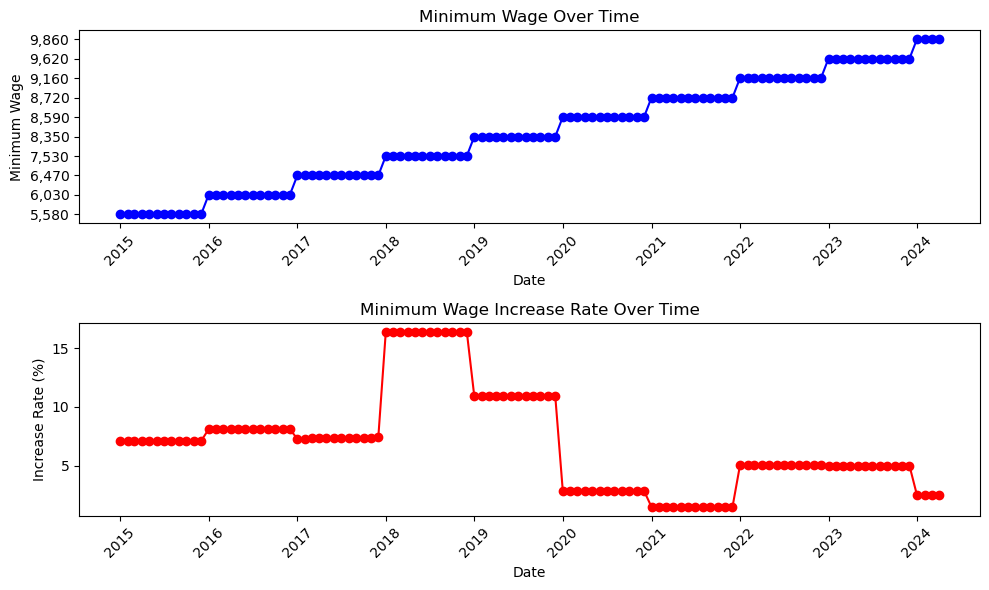

In [7]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

# 최저 시급 그래프
plt.subplot(2, 1, 1)
plt.plot(min_wage['date'],min_wage['Min wage(hour)'], marker='o', linestyle='-', color='b')
plt.title('Minimum Wage Over Time')
plt.xlabel('Date')
plt.ylabel('Minimum Wage')
plt.xticks(rotation=45)

# 최저 시급 인상률 그래프
plt.subplot(2, 1, 2)
plt.plot(min_wage['date'], min_wage['Min wage Increase rate'], marker='o', linestyle='-', color='r')
plt.title('Minimum Wage Increase Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Increase Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# 한 번만 실행 가능합니다. 다시 실행할 때는 Kernel을 재시작 해주세요
# date 컬럼을 인덱스로 설정
min_wage.set_index('date', inplace=True)

# 데이터프레임의 인덱스를 다시 초기화하여 일별 데이터로 확장
min_wage = min_wage.resample('D').ffill()

# 데이터프레임의 인덱스를 다시 초기화하고, 날짜를 원하는 형식으로 변환
min_wage.reset_index(inplace=True)
min_wage['date'] = min_wage['date'].dt.strftime('%Y-%m-%d')

# 결과 출력
min_wage

,date,Min wage(hour),Min wage Increase rate
0,2015-01-01,"5,580",7.1
1,2015-01-02,"5,580",7.1
2,2015-01-03,"5,580",7.1
3,2015-01-04,"5,580",7.1
4,2015-01-05,"5,580",7.1
...,...,...,...
3374,2024-03-28,"9,860",2.5
3375,2024-03-29,"9,860",2.5
3376,2024-03-30,"9,860",2.5
3377,2024-03-31,"9,860",2.5


In [9]:
min_wage.to_csv('Min_wage_cleaned.csv',index=False)